<a href="https://colab.research.google.com/github/codevic/DataScience/blob/master/MiniProject_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
!pip install wordcloud
!pip install -U gensim
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
from gensim.models import ldamodel
import gensim.corpora
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt



Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.6.0)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


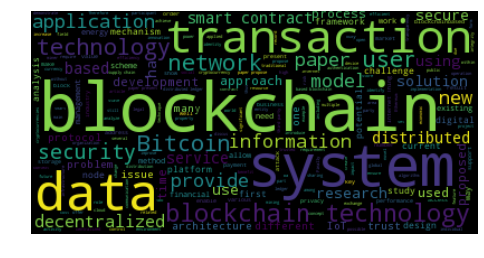

THE LDA TOPICS:-
       Topic # 01     Topic # 02   Topic # 03  Topic # 04        Topic # 05  \
0         Bitcoin     blockchain   blockchain  blockchain        blockchain   
1      technology         system          The    contract               The   
2         digital     technology   technology  technology        technology   
3      blockchain            The        model      system              data   
4              In          paper       system      puzzle           Bitcoin   
5          system             In   Blockchain          We                In   
6             The    distributed  information        time       application   
7              ha             We           In     problem       transaction   
8     transaction       security       attack         may             paper   
9             new  decentralized     protocol       using            system   
10       currency        network         This       model          proposed   
11           user         ledger   

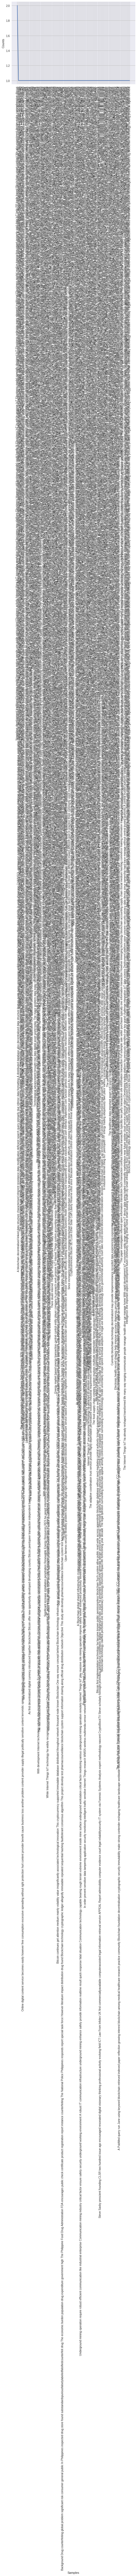

In [0]:
!pip install xlrd
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')
def load_data(arg1):
    return pd.read_excel(arg1)

def text_cleaning(arg1):
    stopwords = nltk.corpus.stopwords.words("english")
    text_list_clean = arg1[:]
    text_list_clean_final = []
    for i in text_list_clean:
        word_tokens = word_tokenize(str(i))#tokanization
        lemmatizer = WordNetLemmatizer()
        word_tokens_lemmatized = [lemmatizer.lemmatize(i) for i in word_tokens] # lemmatzing the data

        i = [w for w in word_tokens_lemmatized if not w in stopwords]# removing stop STOPWORDS

        table = str.maketrans({key: None for key in string.punctuation})# applying punctuation

        i = str(i).translate(table)

        table1 = str.maketrans({key: None for key in string.digits})#removing digits

        i=str(i).translate(table1)

        i= i.strip()
        text_list_clean_final.append(i)

    return text_list_clean_final

def get_lda_topics(model, num_topics):
    word_dict = {}
    for i in range(num_topics):
        words = model.show_topic(i, topn = 20)
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]
    return pd.DataFrame(word_dict)

def get_nmf_topics(model, n_top_words):

    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names()

    word_dict = {};
    for i in range(num_topics):

        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;

    return pd.DataFrame(word_dict);


if __name__ == '__main__':

    data = load_data("blockchain_data.xlsx")
    data = data[['AB']]
    data_final = np.array(data)

    preprocessed_data=text_cleaning(data_final)

    preprocessed_data_lda = [i.split() for i in preprocessed_data]# changed the preprocessed data for lda

    word_cloud_text=''.join(preprocessed_data)# changed the preprocessed_data for workcloud

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(word_cloud_text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    #LDA
    num_topics = 25
    id2word = gensim.corpora.Dictionary(preprocessed_data_lda)
    corpus = [id2word.doc2bow(text) for text in preprocessed_data_lda]
    lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
    print("THE LDA TOPICS:-")
    print(get_lda_topics(lda, num_topics))

    #LDA ends

    #NMF
    vectorizer = CountVectorizer(analyzer='word', max_features=5000);
    x_counts = vectorizer.fit_transform(preprocessed_data);

    transformer = TfidfTransformer(smooth_idf=False);
    x_tfidf = transformer.fit_transform(x_counts);

    xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

    #obtain a NMF model.
    model = NMF(n_components=num_topics, init='nndsvd');

    #fit the model
    model.fit(xtfidf_norm)


    print("THE NMF TOPICS:-")
    print(get_nmf_topics(model, 20))

    #nmf ends here


    # plotting 100 most frequent words
    fdist_top_100 = nltk.FreqDist(text_cleaning(preprocessed_data))
    fdist_top_100.plot(100, cumulative=False)